<a href="https://colab.research.google.com/github/keerthikorumilli/FMML_COURSE_ASSIGNMENT/blob/main/Module6_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions

---



---




```
Module Coordinator : Sajal Khandelwal
```


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset. 

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


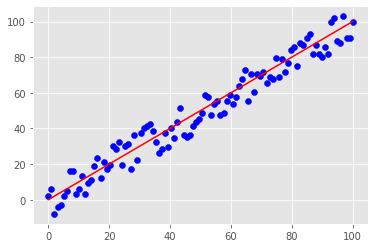

In [ ]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is 

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is. 

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [ ]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [ ]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability. 

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information. 

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels. 

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

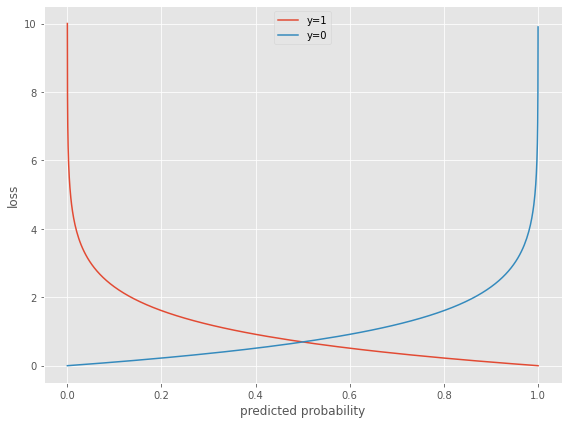

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)
  
  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data. 

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

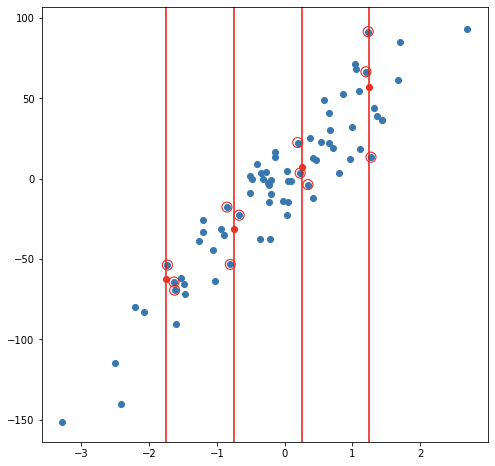

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_LF              8523 non-null   uint8  
 6   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Fat_Content_low fat         8523 non-null   uint8  
 9   Item_Fat_Content_reg             8523 non-null   uint8  
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5966, 35), (5966,), (2557, 35), (2557,))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 

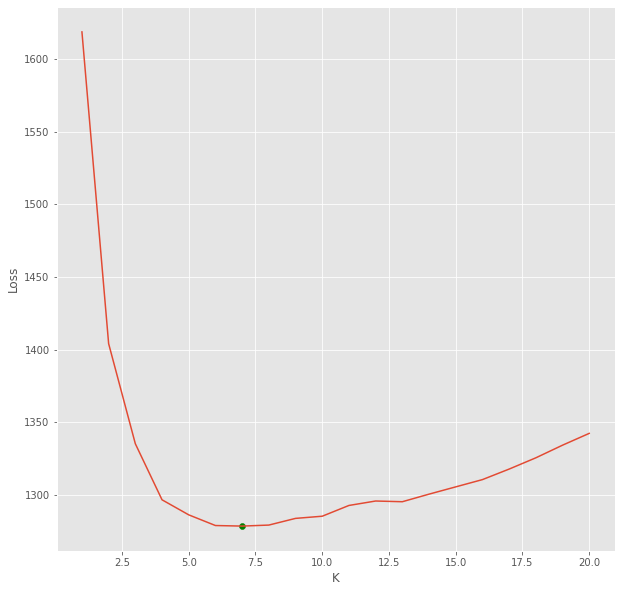

Minimum error 1278.5816281094171 is at k = 7


In [ ]:
rmse_val = [] 

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.scatter(int(np.argmin(rmse_val))+1,float(np.min(rmse_val)),c="green")
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()


rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)+1))

In [ ]:
# Therefore the optimal value for parameter "k" is at 6th index in rmse_val
np.argmin(rmse_val)
# 6th index means 7th element starting from first element in rmse_val

6

In [ ]:
rmse_val

array([1618.57176436, 1404.08697789, 1335.2206046 , 1296.66512345,
       1286.31364435, 1278.96885109, 1278.58162811, 1279.28345642,
       1283.881831  , 1285.37332412, 1292.77781007, 1295.83322729,
       1295.34477347, 1300.5582567 , 1305.56375593, 1310.55655471,
       1317.80202162, 1325.54575215, 1334.23955511, 1342.37070108])

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.

# 1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
### HeightWeight.csv is the dataset.
### The main aim is to predict weight of a person from it's height.
### Input  = Height
### Output = Weight 

In [ ]:
from google.colab import drive
#drive.mount("/content/gdrive/", force_remount=True)
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
root_path = 'gdrive/My Drive/New_Project'
print(os.getcwd())
os.chdir(root_path)
!ls

/content
burden-of-disease-by-cause.csv	heart.csv  HeightWeight.csv


In [ ]:
df=pd.read_csv("HeightWeight.csv")
df.drop(["Index"], axis=1, inplace=True)
df.columns=['Height','Weight']
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0.5, 1.0, 'Height vs. Weight')

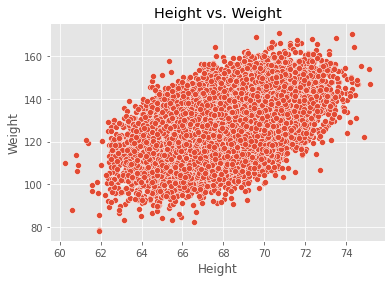

In [ ]:
import seaborn as sns
sns.scatterplot(df['Height'], df['Weight'])
plt.title("Height vs. Weight")

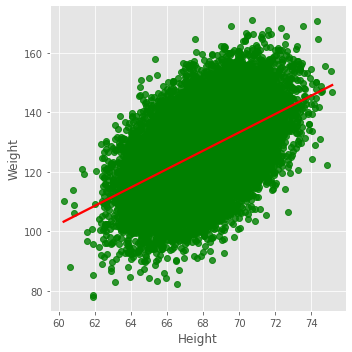

In [ ]:
sns.lmplot(x ='Height', y ='Weight', data = df, scatter_kws={'color':'green'}, line_kws={'color': 'red'})

In [ ]:
X=df[['Height']]
y=df[['Weight']]

In [ ]:
X.mean(), X.std()

(Height    67.993114
 dtype: float64, Height    1.901679
 dtype: float64)

In [ ]:
y.mean(), y.std()

(Weight    127.079421
 dtype: float64, Weight    11.660898
 dtype: float64)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 1), (5000, 1), (20000, 1), (5000, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
def result(obj,X_train,X_test,y_train, y_test):
  print("Training accuracy                   = ", obj.score(X_train, y_train))
  print("Testing Accuracy                    = ", obj.score(X_test, y_test))
  y_pred=obj.predict(X_test)
  print("Mean Squared Error(MSE)             = ",mean_squared_error(y_test, y_pred))
  print("Root Mean Squared Error(RMSE)       = ",math.sqrt(mean_squared_error(y_test, y_pred)))
  print("Mean Absolute Error(MAE)            = ",mean_absolute_error(y_test, y_pred))
  print("Mean Squared Log Error(MSLE)        = ",mean_squared_log_error(y_test, y_pred))
  print("Root Mean Squared Log Error(RMSLE)  = ",math.sqrt(mean_squared_log_error(y_test, y_pred)))

In [ ]:
lin=LinearRegression()
lin.fit(X_train, y_train)

result(lin, X_train, X_test, y_train, y_test)

Training accuracy                   =  0.2512036713949942
Testing Accuracy                    =  0.2588330299924131
Mean Squared Error(MSE)             =  105.05298919282605
Root Mean Squared Error(RMSE)       =  10.24953604768655
Mean Absolute Error(MAE)            =  8.187041886060046
Mean Squared Log Error(MSLE)        =  0.006617106293606728
Root Mean Squared Log Error(RMSLE)  =  0.08134559787478808


### Observations :-
#### 1. The dataset is positively correlated and and it is having a greater standard deviations across it's mean.
#### 2. So, the testing and training accuracies are very low.
#### 3. To predict weight of a person accurately, along with height, some other features like age, gender, skinthickness, etc., are required.
#### 4. High mean squared, root mean squared errors represents that the model needs to be improved by adding extra features.
#### 5. Mean Squared Log Error(MSLE) tries to treat small differences between small actual and predicted values approximately the same as big differences between large actual and predicted values. Therefore, MSLE and RMSLE are greater than other types of losses.
### * So, in this case, Mean Squared Error(MSE), Mean Absolute Error(MAE), Root Mean Squared Log Error(RMSLE) loss functions performed well.


# 2. Explore other loss functions and try to understand when and why they are used.

## There are different loss functions other than MSE, RMSE, MAE. They are :-
### 1. Logloss
####* Log Loss is the negative average of the log of corrected predicted probabilities for each instance.When modelling a classification in which input variables need to be labelled according to different classes, the task can be represented as predicting the likelihood of belonging to each class. The model will predict probabilities given the training data based on the weights in the training dataset, and the model will adjust its weights to minimize the difference between its predicted probabilities and the training data’s distribution of probabilities. This calculation is called cross-entropy.

####* The phrase “cross-entropy” is sometimes used to refer to the negative log-likelihood of a Bernoulli or softmax distribution, although this is incorrect. It is possible to define a loss as a cross-entropy between an empirical distribution derived from the training set and a probability distribution derived from the model when it is characterized by a negative log-likelihood. Mean squared error, for example, is the cross-entropy between an empirical distribution and a Gaussian model.

####* Whenever the concept of maximum likelihood estimation is utilized by the algorithm the loss function is a cross-entropy loss function. When modifying model weights during training, the cross-entropy loss is utilised. The goal is to minimise the loss, which means that the smaller the loss, the better the model. The cross-entropy loss of a perfect model is zero.
####* It is mostly used in classification tasks like disease prediction as well as regression tasks like price prediction, weather forecasting.

In [ ]:
from sklearn.metrics import log_loss
from sklearn.datasets import load_iris

In [ ]:
# Iris species classification dataset is taken
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X=pd.DataFrame(data['data'], 
               columns=["sepal_length","sepal_width","petal_length","petal_width"])
y=pd.DataFrame(data['target'],columns=['target'])
# 0 = Iris-Setosa
# 1 = Iris-Versicolour
# 3 = Iris-Virginica
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, random_state=1, stratify=y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [ ]:
y_train.value_counts()

target
0         40
1         40
2         40
dtype: int64

In [ ]:
y_test.value_counts()

target
0         10
1         10
2         10
dtype: int64

In [ ]:
import warnings as warn
warn.filterwarnings("ignore")

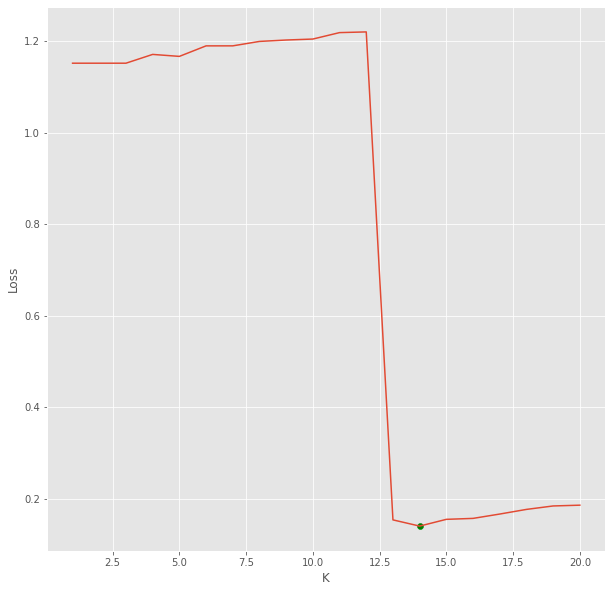

Minimum error 0.14118585827742286 is at k = 14


In [ ]:
def knn(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsClassifier(n_neighbors = k)

    model.fit(x_train, y_train)  
    pred=pd.DataFrame(model.predict(x_test), columns=['target'])

    pred = model.predict_proba(x_test)
    error = log_loss(y_test,pred) 

    loss_val.append(error) 
loss_val = [] 

for k in range(1,21):
  knn(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),loss_val)
plt.scatter(int(np.argmin(loss_val))+1,float(np.min(loss_val)),c="green")
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()


loss_val = np.asarray(loss_val)
print("Minimum error {} is at k = {}".format(np.min(loss_val),np.argmin(loss_val)+1))

## 2.Mean Squared Logarithmic Error (MSLE) :-
#### * MSLE is the relative difference between the log-transformed actual and predicted values.
#### * MSLE only care about the percentual difference between the log-transformed actual and predicted values.
#### * MSLE tries to treat small differences between small actual and predicted values approximately the same as big differences between large actual and predicted values.
#### * MSLE tries to treat a small and big difference between the actual and predicted values ​.
#### * MSLE also attempts to penalize the underestimates value more than overestimates values.
#### * RMSLE is usually used when you don't want to penalize the large differences in the predicted and the actual values when the predicted and the actual values are big numbers.
#### * For example if we want to Predict how many future visitors a restaurant will receive. The future visitors is a continuous value, and therefore, we want to do regression MSLE can here be used as the loss function.
#### * Other applications are house price prediction, sales forecasting, etc,.

In [ ]:
from sklearn.metrics import mean_squared_log_error

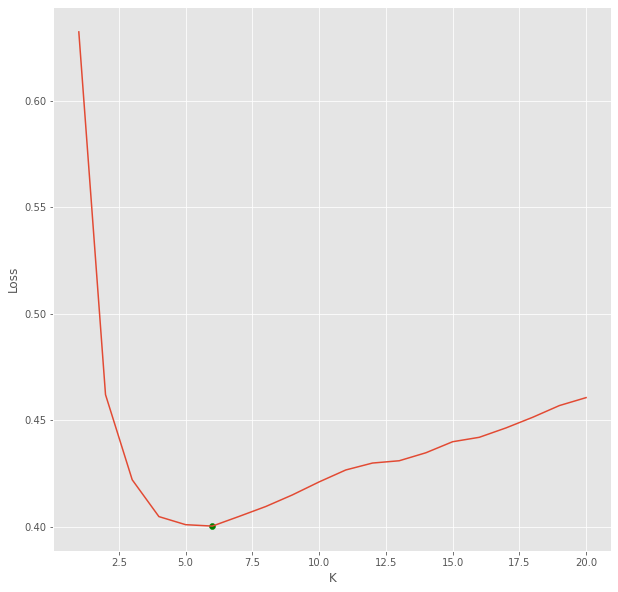

Minimum error 0.4002486062368381 is at k = 6


In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    error = mean_squared_log_error(y_test,pred)
    loss_val.append(error) 
loss_val = [] 

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),loss_val)
plt.scatter(int(np.argmin(loss_val))+1,float(np.min(loss_val)),c="green")
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()


loss_val = np.asarray(loss_val)
print("Minimum error {} is at k = {}".format(np.min(loss_val),np.argmin(loss_val)+1))

## 3. Root Mean Squared Logarithmic Error(RMSLE) :- 
#### * RMSLE is the square root of Mean Squared Logarithmic Error(MSLE)
#### * It is usually used when you don't want to penalize the large differences in the predicted and the actual values when the predicted and the actual values are big numbers.
#### * Applications are house price prediction, sales forecasting, etc,.

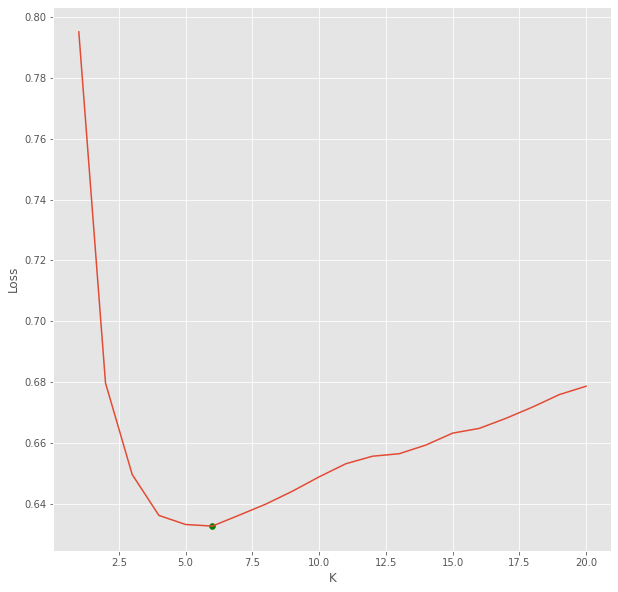

Minimum error 0.6326520419921507 is at k = 6


In [ ]:
import math
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    error = math.sqrt(mean_squared_log_error(y_test,pred))
    loss_val.append(error) 
loss_val = [] 

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),loss_val)
plt.scatter(int(np.argmin(loss_val))+1,float(np.min(loss_val)),c="green")
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()


loss_val = np.asarray(loss_val)
print("Minimum error {} is at k = {}".format(np.min(loss_val),np.argmin(loss_val)+1))

# 3. Try out KNN-regression on other datasets see which values of K give the best results.

### California_housing dataset is taken.
### Aim = To predict "median_house_value".

In [ ]:
data_train=pd.read_csv("/content/sample_data/california_housing_train.csv")
data_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [ ]:
data_test=pd.read_csv("/content/sample_data/california_housing_test.csv")
data_test.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0


In [ ]:
data_train.shape,data_test.shape

((17000, 9), (3000, 9))

In [ ]:
X_train=data_train.drop(['median_house_value'],axis=1)
y_train=data_train[['median_house_value']]

In [ ]:
X_test=data_test.drop(['median_house_value'],axis=1)
y_test=data_test[['median_house_value']]

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((17000, 8), (17000, 1), (3000, 8), (3000, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
X_train.shape, y_train.shape

((17000, 8), (17000, 1))

In [ ]:
X_test.shape, y_test.shape

((3000, 8), (3000, 1))

In [ ]:
type(X_train),type(X_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

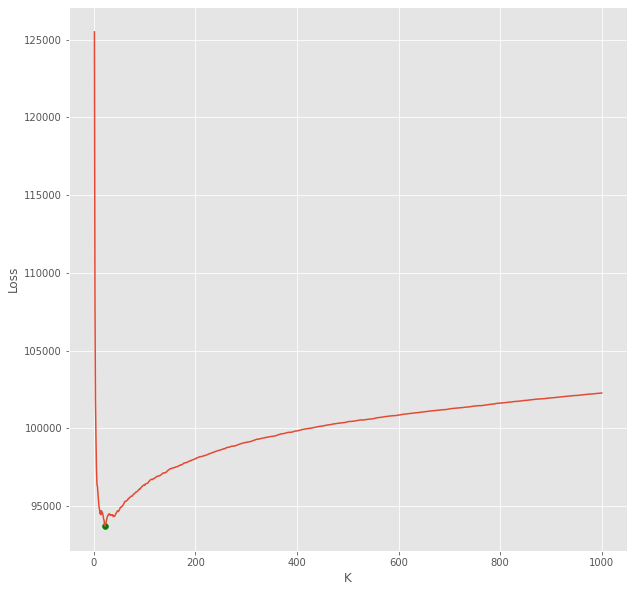

Minimum error 93714.18559213018 is at k = 22


In [ ]:
rmse_val = [] 

for k in range(1,1001):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,1001),rmse_val)
plt.scatter(int(np.argmin(rmse_val))+1,float(np.min(rmse_val)),c="green")
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()


rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)+1))

## Here, the error metric considered is "RMSE"(Root Mean Squared Error).
## From the above visualization, it is concluded that for "k" value= 22, the error= 93714.18559213018 is minimized.
## If "k" value is too low, it has generated a huge error.
## As "k" value decreased to 22, error decreased at a greater rate.
## As "k" value increased from 22, error also increased.

## END


---



---

